In [1]:
# Import necessary packages here:
import numpy as np              
import matplotlib.pyplot as plt 
import pandas as pd  
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.interpolate import griddata
from datetime import datetime

# The Impact of Seismic Activity on Oceanic Primary Productivity  

**Elizabeth French**  

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->

Organic matter settles on the seafloor and accumulates over time. This organic matter is mostly made of dead phytoplankton and zooplankton that sink from the surface. This organic matter is primarily composed of carbon, hydrogen, oxygen, and nitrogen. Then, seismic activity disrupts the seafloor, especially along plate boundaries where there is the most activity. Vertical movement of the crust displaces large volumes of water that cause further disruption to the surrounding environments and water column properties. I wanted to see if there was a correlation between these disturbances and the primary productivity in a water column, and if that process was influenced by nutrient output.  

My research question was 'Does seismic activity influence the release of nutrients from the seafloor?' Given the background information, I hypothesized that underwater seismic activities trigger the release of nutrients into the water column, increasing primary productivity in response.


## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- Dataset 1
  - Downloaded from the Ocean Observatories Initiative on 2024-11-11.
  - Data collection process: Data collected by the Axial Base Shallow Profiler Mooring from 5-200m depth
  - Relevant variables included: 
    - Nitrate concentration (umol/L)
  - Obstacles to data access: Data for depth value was missing upon download, so I had to average the entire water column
  - Temporal coverage and resolution: days/weeks, Oct 2014 - now
  - URL to dataset: https://dataexplorer.oceanobservatories.org/#metadata/104328/station/124/sensor/data?start=2014-10-07T21:55:00Z&end=2024-12-06T08:47:00Z&leg_clim_max=false&leg_clim_min=false&leg_minmax=false&fr=array.platform_type 
<br>
- Dataset 2
  - Downloaded from Copernicus Marine Service on 2024-11-18.
  - Data collection process: Data collected by satellite library
  - Relevant variables included: 
    - Net primary production of biomass expressed as carbon per unit volume in sea water (nppv) 
  - Spatial coverage and resolution: Global Ocean Lat -80° to 90°, Lon -180° to 179.75°, 0.25° × 0.25° grid
  - Obstacles to data access: none - downloading process was simple
  - Temporal coverage and resolution: daily, Feb 2011 - March 2011 
  - URL to dataset: https://data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_BGC_001_029/description 
<br>

## 1. Analyzing nitrate over time in a fixed location   

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

I worked with the OOI Axial Seamount mooring dataset that observed nitrate concentrations from March 2015 to June 2015. The figures produced represent the nitrate concentrations throughout the whole water column, in the duration of the timeframe the data was downloaded from. The figures were expected to show a difference in the nitrate concentration and distribution in response to the earthquake that occurred on April 24, 2014.

In [2]:
# Load data file 1 (grouped by weeks)
file_path1 = "data/Nitrogen-Nitrate_-Binned-weeks.csv"
df_w = pd.read_csv(file_path1)
#display(df_w)

# Load data file 2 (grouped by days)
file_path2 = "data/Nitrogen-Nitrate_-Binned-days.csv"
df_d = pd.read_csv(file_path2)
#display(df_d)

In [3]:
# Perform data cleaning steps

# Convert to datetime
df_w['Start date'] = pd.to_datetime(df_w['Start date'])

# Group by Start date and calculate the mean for the mean, min, and max columns --> averaged due to unknown depth values
averages_df_w = df_w.groupby('Start date')[['Mean', 'Min', 'Max']].mean().reset_index()

# Rename the columns
averages_df_w.columns = ['Start date', 'Mean average', 'Min average', 'Max average']

# Display averages_df_w
display(averages_df_w)

# Repeat process for df_d (days) from file 2
df_d['Start date'] = pd.to_datetime(df_d['Start date'])

# Group by Start date and calculate the mean for the mean, min, and max columns
averages_df_d = df_d.groupby('Start date')[['Mean', 'Min', 'Max']].mean().reset_index()

# Rename the columns
averages_df_d.columns = ['Start date', 'Mean average', 'Min average', 'Max average']

display(averages_df_d)

,Start date,Mean average,Min average,Max average
0,2015-03-16 00:00:00+00:00,10.983356,10.471891,11.480850
1,2015-03-23 00:00:00+00:00,10.390709,9.696982,11.157590
2,2015-03-30 00:00:00+00:00,7.848467,7.383768,8.335301
3,2015-04-06 00:00:00+00:00,9.601756,5.786286,11.448298
4,2015-04-13 00:00:00+00:00,11.110994,8.535855,12.201613
5,2015-04-20 00:00:00+00:00,9.285451,8.300900,10.282753
6,2015-04-27 00:00:00+00:00,9.378729,8.747633,9.963567
7,2015-05-04 00:00:00+00:00,9.097753,8.515174,9.748427
8,2015-05-11 00:00:00+00:00,9.184369,8.381604,10.080705
9,2015-05-18 00:00:00+00:00,10.608382,9.729603,11.397016


,Start date,Mean average,Min average,Max average
0,2015-03-30 00:00:00+00:00,10.690625,10.291015,10.930208
1,2015-04-01 00:00:00+00:00,13.367959,13.317456,13.404619
2,2015-04-02 00:00:00+00:00,8.852620,8.619868,9.119095
3,2015-04-03 00:00:00+00:00,9.535447,9.127932,9.822693
4,2015-04-04 00:00:00+00:00,10.871082,10.640686,11.108388
...,...,...,...,...
59,2015-05-29 00:00:00+00:00,7.826000,7.740320,7.871546
60,2015-05-30 00:00:00+00:00,12.864080,12.779520,12.929646
61,2015-05-31 00:00:00+00:00,10.580032,10.251395,10.711209
62,2015-06-01 00:00:00+00:00,11.234484,10.819284,11.503815


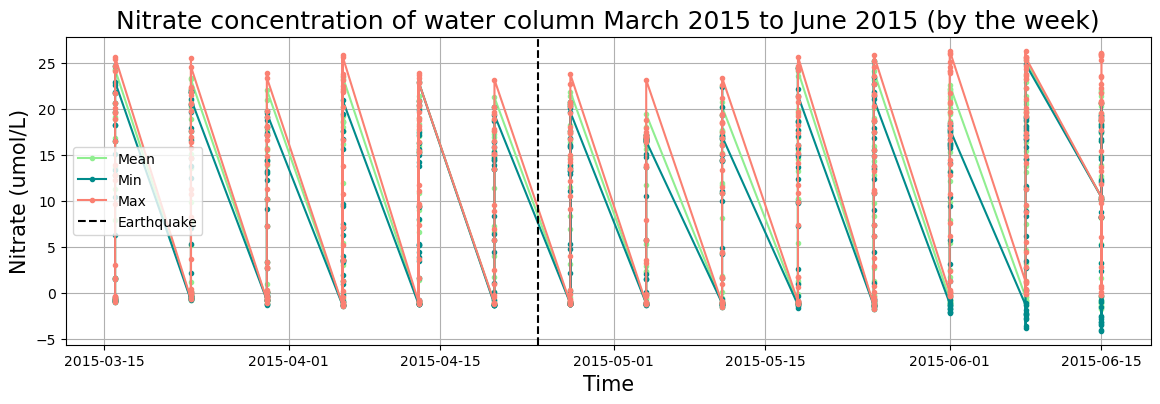

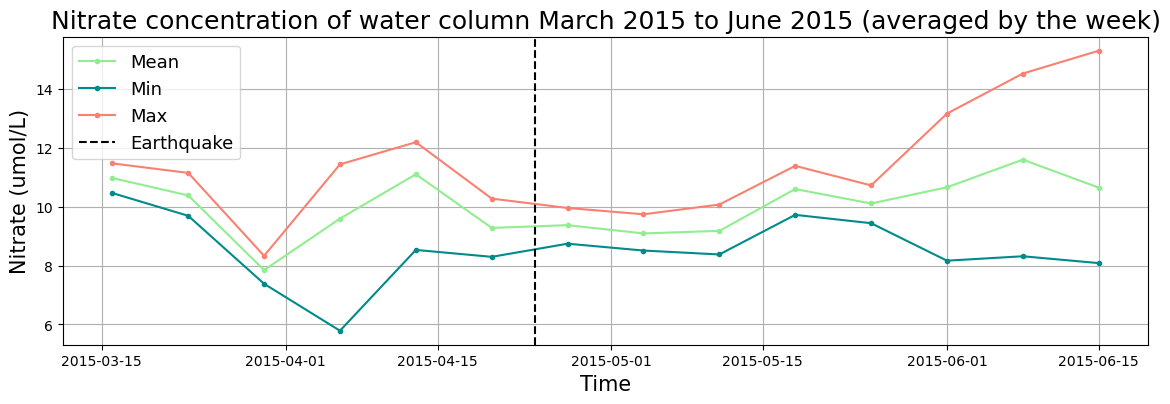

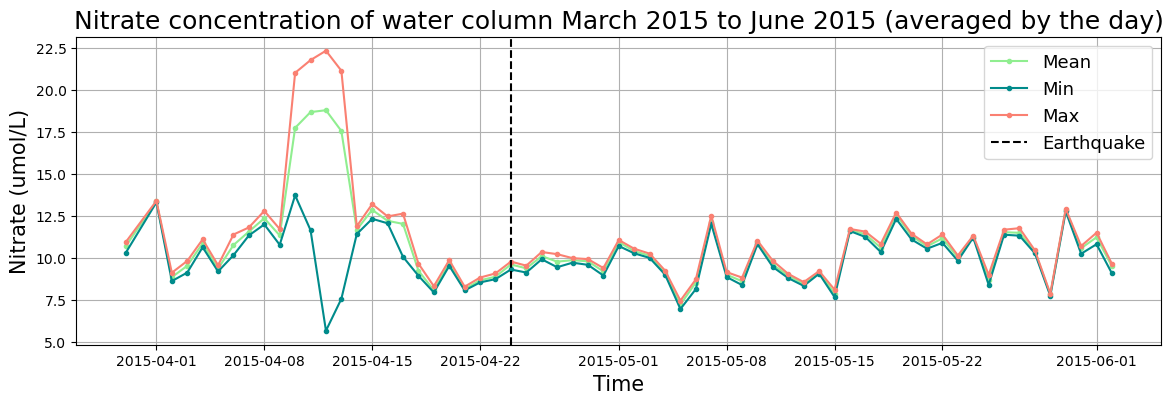

In [4]:
# Plot data by weeks

# Create a plot and add a grid
fig, axs = plt.subplots(figsize=(14,4))
axs.grid() 

# Set variables to plot using df_w columns
x = df_w['Start date']
y = df_w['Mean']
y2 = df_w['Min']
y3 = df_w['Max']

# Plot data of mean, min, and max along time. Set different colors for each and add label.
axs.plot(x,y, marker='.', c='lightgreen', label='Mean') 
axs.plot(x,y2, marker='.', c='darkcyan', label='Min') 
axs.plot(x,y3, marker='.', c='salmon', label='Max') 

# Add title and x/y labels
axs.set_xlabel('Time', fontsize=15)
axs.set_ylabel('Nitrate (umol/L)', fontsize=15) 
axs.set_title('Nitrate concentration of water column March 2015 to June 2015 (by the week)', fontsize=18) 

# Add earthquake event marker
axs.axvline(x=datetime.strptime('2015-04-24', '%Y-%m-%d'), color='black', linestyle='--', label='Earthquake')

## I had a struggle figuring out how to access datetime, but found that my solution was to just use strptime

# Add a legend
axs.legend(fontsize=10)

## Issue: data points for each depth value make for a visually confusing graph --> no conclusions can be drawn. 
## However, I did not have depth value data, so I had to average everything in order to avoid misrepresenting anything


# Repeat steps above to plot data averaged by weeks 

fig, axs = plt.subplots(figsize=(14,4))
axs.grid() 
 
a = averages_df_w['Start date']
b = averages_df_w['Mean average']
b2 = averages_df_w['Min average']
b3 = averages_df_w['Max average']

axs.plot(a,b, marker='.', c='lightgreen', label='Mean') 
axs.plot(a,b2, marker='.', c='darkcyan', label='Min') 
axs.plot(a,b3, marker='.', c='salmon', label='Max') 

axs.set_xlabel('Time', fontsize=15)
axs.set_ylabel('Nitrate (umol/L)', fontsize=15) 
axs.set_title('Nitrate concentration of water column March 2015 to June 2015 (averaged by the week)', fontsize=18) 

axs.axvline(x=datetime.strptime('2015-04-24', '%Y-%m-%d'), color='black', linestyle='--', label='Earthquake')

axs.legend(fontsize=13)

## Issue: No clear results --> tried looking at a smaller scale of days instead, below.


# Repeat steps above to plot data averaged by days

fig, axs = plt.subplots(figsize=(14,4))
axs.grid() 
 
aday = averages_df_d['Start date']
bday = averages_df_d['Mean average']
b2day = averages_df_d['Min average']
b3day = averages_df_d['Max average']

axs.plot(aday,bday, marker='.', c='lightgreen', label='Mean') 
axs.plot(aday,b2day, marker='.', c='darkcyan', label='Min') 
axs.plot(aday,b3day, marker='.', c='salmon', label='Max') 

axs.set_xlabel('Time', fontsize=15)
axs.set_ylabel('Nitrate (umol/L)', fontsize=15) 
axs.set_title('Nitrate concentration of water column March 2015 to June 2015 (averaged by the day)', fontsize=18) 

axs.axvline(x=datetime.strptime('2015-04-24', '%Y-%m-%d'), color='black', linestyle='--', label='Earthquake')

axs.legend(fontsize=13)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 1 Caption:** 
Top: The nitrate averaged over weeks is unable to be observed given the measurements being located at every depth value. 
Middle: Nitrate concentration by the mooring from March 2015 to June 15, averaged over weeks. 
Bottom: Nitrate concentration by the mooring from March 2015 to June 15, averaged over days. 

The stabilization/plateau following the earthquake could potentially indicate a more mixed water column in nitrate concentrations. The variation surrounding the event could be from a more stratified water column. No definite conclusion is drawn from these. 

## 2. Averaging net primary production of biomass over the northeast coast of Japan  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

I used the Copernicus satellite data from February 2011 to March 2011. The figures produced represent the net primary production of biomass on the northeast coast of Japan over this timeframe to show a response in those levels of nppv following the earthquake that occurred on March 11, 2011. The indication of biomass could be linked to nitrate concentration. 

In [5]:
# Load file and open/store into ds variable 
file_path3 = "data/cmems_mod_glo_bgc_my_0.25deg_P1D-m_1732768788293.nc"
ds = xr.open_dataset(file_path3)

In [6]:
# Filter rows where data is taken at the surface and store into new variable
filtered_data = ds.sel(depth=0, method='nearest')

# Display filtered_data
display(filtered_data)

# Calculate the mean NPPV over latitude / longitude
nppv_mean = filtered_data['nppv'].mean(dim=['latitude', 'longitude'])

# Extract time and NPPV and store into variables
time = filtered_data['time'].values
nppv = nppv_mean.values

<xarray.Dataset>
Dimensions:    (time: 46, latitude: 41, longitude: 41)
Coordinates:
  * time       (time) datetime64[ns] 2011-02-14 2011-02-15 ... 2011-03-31
    depth      float32 0.5058
  * latitude   (latitude) float32 32.0 32.25 32.5 32.75 ... 41.5 41.75 42.0
  * longitude  (longitude) float32 138.0 138.2 138.5 138.8 ... 147.5 147.8 148.0
Data variables:
    chl        (time, latitude, longitude) float32 ...
    no3        (time, latitude, longitude) float32 ...
    nppv       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:       CF-1.11
    title:             Daily mean fields for product GLOBAL_REANALYSIS_BIO_00...
    institution:       Mercator Ocean
    producer:          CMEMS - Global Monitoring and Forecasting Centre
    source:            MERCATOR FREEBIORYS2V4
    credit:            E.U. Copernicus Marine Service Information (CMEMS)
    contact:           servicedesk.cmems@mercator-ocean.eu
    references:        http://marine.copernicus.eu
    subset:source:     ARCO data downloaded from the Marine Data Store using ...
    subset:productId:  GLOBAL_MULTIYEAR_BGC_001_029
    subset:datasetId:  cmems_mod_glo_bgc_my_0.25deg_P1D-m_202406
    subset:date:       2024-11-28T04:39:48.294Z

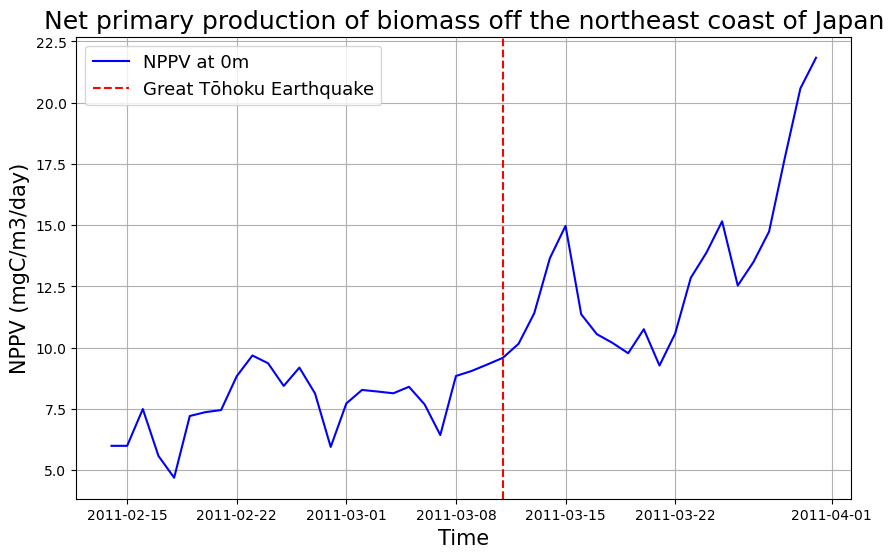

In [7]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(time, nppv, label='NPPV at 0m', color='blue')

# Add the Earthquake event marker
plt.axvline(x=datetime.strptime('2011-03-11', '%Y-%m-%d'), color='red', linestyle='--', label='Great Tōhoku Earthquake')

# Add plot elements: Title, labels, grid, and legend
plt.xlabel('Time', fontsize=15)
plt.ylabel('NPPV (mgC/m3/day)', fontsize=15)
plt.title('Net primary production of biomass off the northeast coast of Japan', fontsize=18)
plt.legend(fontsize=13)
plt.grid()
#plt.tight_layout()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 2 Caption:** Net primary production of biomass off the northeast coast of Japan from February 2011 to the end of March 2011. A gradual increase in NPPV is observed before the earthquake, but a spike occurs immediately following the event. An exponential growth continues post-event, indicating possible causation. 

## 3. Locating the points of greatest net primary production of biomass  

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

Building off from the last data, these figures represent where the most biomass is observed, also demonstrating a lag in the process. 

In [8]:
dataset = xr.open_dataset(file_path3)

Text(0.5, 1.0, 'Net primary production of biomass - Feb 22, 2011')

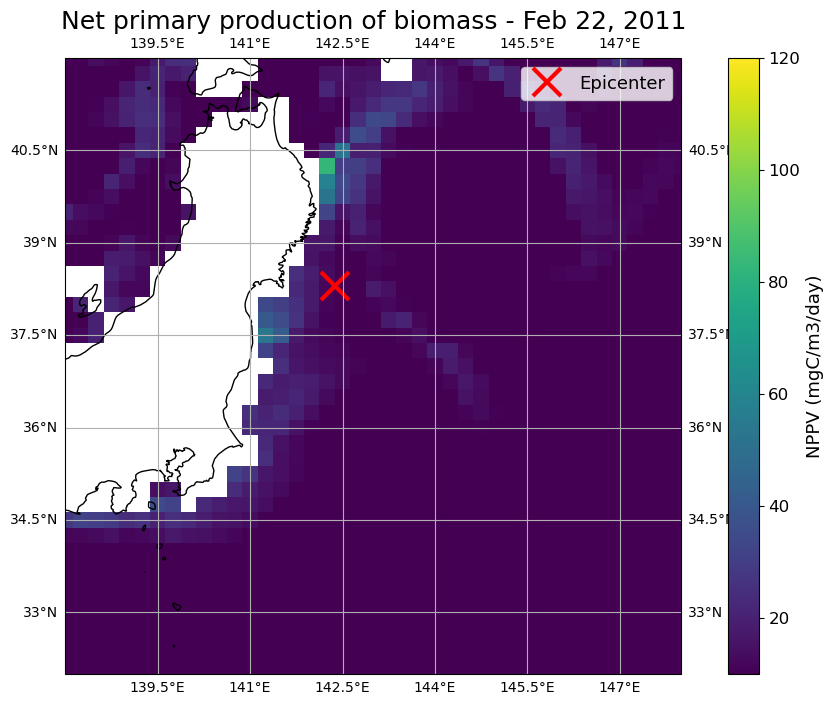

In [9]:
# DATA & PLOT 1/5

time = dataset['time']

## I had an error for retrieving the time column and selecting one date in filtered_data below, so I created a singular variable for time to access

# Filter rows where time equals '2011-02-22' and data is taken at the surface
filtered_data = dataset.sel(time = '2011-02-22')
filtered_data = filtered_data.sel(depth=0, method='nearest')


# Variables to access the subsetted data
nppv = filtered_data['nppv'].values 
longitude = filtered_data['longitude'].values
latitude = filtered_data['latitude'].values

# Create meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Flatten the arrays
nppv_flat = nppv.flatten()
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

## I also had a challenge getting rid of an error stating my arrays were not the same size later when I tried using them in the same argument, but it appears that flattening the array corrected this issue...

# Use griddata to interpolate 
points = np.column_stack((lon_flat, lat_flat))  # use lat and lon as coordinates

# Interpolated grid
nppv_interp = griddata(points, nppv_flat, (lon_grid, lat_grid), method='linear')

# Create a figure with PlateCarree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection = ccrs.PlateCarree())

# Plot the interpolated data using pcolormesh with NPPV range [10,120]
plot = ax.pcolormesh(longitude, latitude, nppv_interp, cmap='viridis', transform=ccrs.PlateCarree(), vmin=10, vmax=120)

# Add a colorbar and label
cbar = plt.colorbar(plot, label='NPPV (mgC/m3/day)')
cbar.ax.set_ylabel('NPPV (mgC/m3/day)', fontsize=13) 
cbar.ax.tick_params(labelsize=12)

# Set map boundaries and add features (coastlines and grid)
ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()])
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add Epicenter marker with legend
ax.plot(142.373, 38.297, 'x', color='red', markersize=20, markeredgewidth=3, label='Epicenter')
ax.legend(fontsize=13)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Net primary production of biomass - Feb 22, 2011', fontsize=18)

## I had an issue with my 'Longitude' and 'Latitude' labels never appearing, and I still am not sure how to correct that

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3.1 Caption:** Net primary production of biomass February 22, 2011.

Text(0.5, 1.0, 'Net primary production of biomass - March 04, 2011')

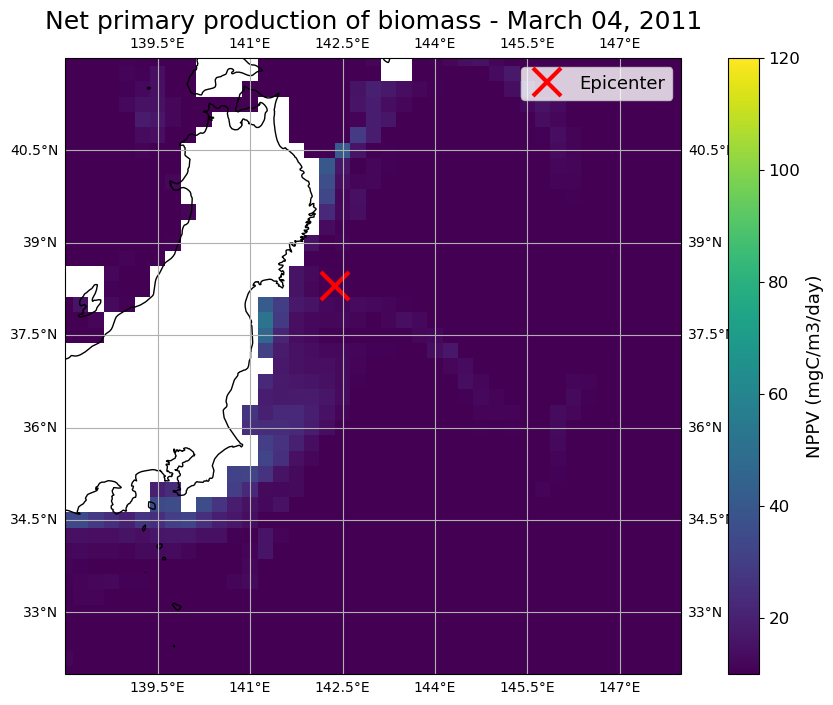

In [10]:
# DATA & PLOT 2/5

# Filter rows where time equals '2011-03-04' and data is taken at the surface
filtered_data = dataset.sel(time = '2011-03-04')
filtered_data = filtered_data.sel(depth=0, method='nearest')


# Variables to access the subsetted data
nppv = filtered_data['nppv'].values 
longitude = filtered_data['longitude'].values
latitude = filtered_data['latitude'].values

# Create meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Flatten the arrays
nppv_flat = nppv.flatten()
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

# Use griddata to interpolate 
points = np.column_stack((lon_flat, lat_flat))  # use lat and lon as coordinates

# Interpolated grid
nppv_interp = griddata(points, nppv_flat, (lon_grid, lat_grid), method='linear')

# Create a figure with PlateCarree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection = ccrs.PlateCarree())

# Plot the interpolated data using pcolormesh with NPPV range [10,120]
plot = ax.pcolormesh(longitude, latitude, nppv_interp, cmap='viridis', transform=ccrs.PlateCarree(), vmin=10, vmax=120)

# Add a colorbar and label
cbar = plt.colorbar(plot, label='NPPV (mgC/m3/day)')
cbar.ax.set_ylabel('NPPV (mgC/m3/day)', fontsize=13) 
cbar.ax.tick_params(labelsize=12)

# Set map boundaries and add features (coastlines and grid)
ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()])
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add Epicenter marker with legend
ax.plot(142.373, 38.297, 'x', color='red', markersize=20, markeredgewidth=3, label='Epicenter')
ax.legend(fontsize=13)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Net primary production of biomass - March 04, 2011', fontsize=18)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3.2 Caption:** Net primary production of biomass March 04, 2011.

Text(0.5, 1.0, 'Net primary production of biomass - March 11, 2011')

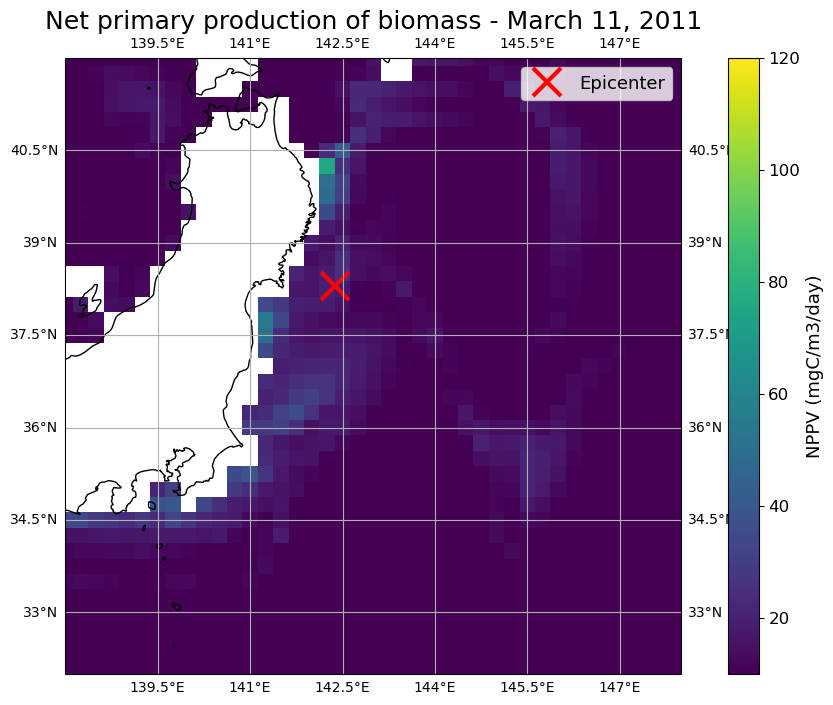

In [11]:
# DATA & PLOT 3/5

# Filter rows where time equals '2011-03-11' and data is taken at the surface
filtered_data = dataset.sel(time = '2011-03-11')
filtered_data = filtered_data.sel(depth=0, method='nearest')


# Variables to access the subsetted data
nppv = filtered_data['nppv'].values 
longitude = filtered_data['longitude'].values
latitude = filtered_data['latitude'].values

# Create meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Flatten the arrays
nppv_flat = nppv.flatten()
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

# Use griddata to interpolate 
points = np.column_stack((lon_flat, lat_flat))  # use lat and lon as coordinates

# Interpolated grid
nppv_interp = griddata(points, nppv_flat, (lon_grid, lat_grid), method='linear')

# Create a figure with PlateCarree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection = ccrs.PlateCarree())

# Plot the interpolated data using pcolormesh with NPPV range [10,120]
plot = ax.pcolormesh(longitude, latitude, nppv_interp, cmap='viridis', transform=ccrs.PlateCarree(), vmin=10, vmax=120)

# Add a colorbar and label
cbar = plt.colorbar(plot, label='NPPV (mgC/m3/day)')
cbar.ax.set_ylabel('NPPV (mgC/m3/day)', fontsize=13) 
cbar.ax.tick_params(labelsize=12)

# Set map boundaries and add features (coastlines and grid)
ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()])
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add Epicenter marker with legend
ax.plot(142.373, 38.297, 'x', color='red', markersize=20, markeredgewidth=3, label='Epicenter')
ax.legend(fontsize=13)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Net primary production of biomass - March 11, 2011', fontsize=18)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3.3 Caption:** Net primary production of biomass March 11, 2011. Day of the earthquake - no direct observations.

Text(0.5, 1.0, 'Net primary production of biomass - March 21, 2011')

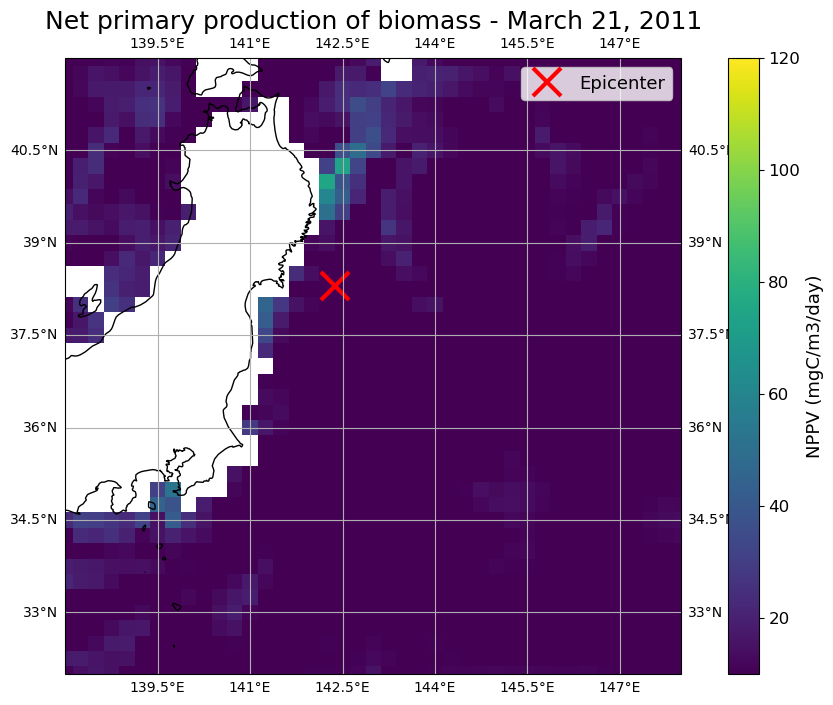

In [12]:
# DATA & PLOT 4/5

# Filter rows where time equals '2011-03-21' and data is taken at the surface
filtered_data = dataset.sel(time = '2011-03-21')
filtered_data = filtered_data.sel(depth=0, method='nearest')


# Variables to access the subsetted data
nppv = filtered_data['nppv'].values 
longitude = filtered_data['longitude'].values
latitude = filtered_data['latitude'].values

# Create meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Flatten the arrays
nppv_flat = nppv.flatten()
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

# Use griddata to interpolate 
points = np.column_stack((lon_flat, lat_flat))  # use lat and lon as coordinates

# Interpolated grid
nppv_interp = griddata(points, nppv_flat, (lon_grid, lat_grid), method='linear')

# Create a figure with PlateCarree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection = ccrs.PlateCarree())

# Plot the interpolated data using pcolormesh with NPPV range [10,120]
plot = ax.pcolormesh(longitude, latitude, nppv_interp, cmap='viridis', transform=ccrs.PlateCarree(), vmin=10, vmax=120)

# Add a colorbar and label
cbar = plt.colorbar(plot, label='NPPV (mgC/m3/day)')
cbar.ax.set_ylabel('NPPV (mgC/m3/day)', fontsize=13) 
cbar.ax.tick_params(labelsize=12)

# Set map boundaries and add features (coastlines and grid)
ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()])
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add Epicenter marker with legend
ax.plot(142.373, 38.297, 'x', color='red', markersize=20, markeredgewidth=3, label='Epicenter')
ax.legend(fontsize=13)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Net primary production of biomass - March 21, 2011', fontsize=18)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3.4 Caption:** Net primary production of biomass March 21, 2011.

Text(0.5, 1.0, 'Net primary production of biomass - March 31, 2011')

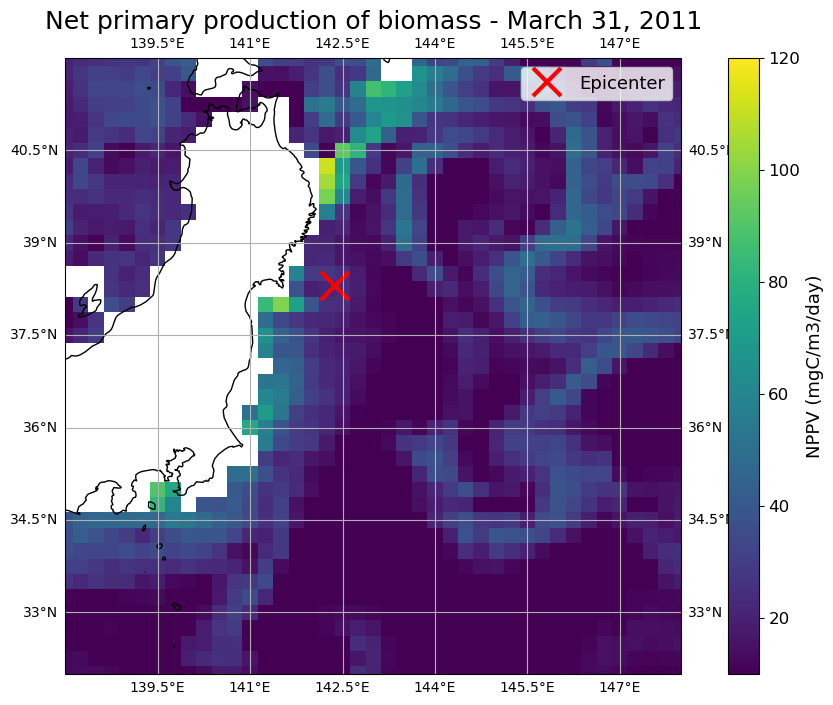

In [13]:
# DATA & PLOT 5/5

# Filter rows where time equals '2011-03-31' and data is taken at the surface
filtered_data = dataset.sel(time = '2011-03-31')
filtered_data = filtered_data.sel(depth=0, method='nearest')


# Variables to access the subsetted data
nppv = filtered_data['nppv'].values 
longitude = filtered_data['longitude'].values
latitude = filtered_data['latitude'].values

# Create meshgrid of latitude and longitude
lon_grid, lat_grid = np.meshgrid(longitude, latitude)

# Flatten the arrays
nppv_flat = nppv.flatten()
lon_flat = lon_grid.flatten()
lat_flat = lat_grid.flatten()

# Use griddata to interpolate 
points = np.column_stack((lon_flat, lat_flat))  # use lat and lon as coordinates

# Interpolated grid
nppv_interp = griddata(points, nppv_flat, (lon_grid, lat_grid), method='linear')

# Create a figure with PlateCarree projection
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection = ccrs.PlateCarree())

# Plot the interpolated data using pcolormesh with NPPV range [10,120]
plot = ax.pcolormesh(longitude, latitude, nppv_interp, cmap='viridis', transform=ccrs.PlateCarree(), vmin=10, vmax=120)

# Add a colorbar and label
cbar = plt.colorbar(plot, label='NPPV (mgC/m3/day)')
cbar.ax.set_ylabel('NPPV (mgC/m3/day)', fontsize=13) 
cbar.ax.tick_params(labelsize=12)

# Set map boundaries and add features (coastlines and grid)
ax.set_extent([longitude.min(), longitude.max(), latitude.min(), latitude.max()])
ax.coastlines()
ax.gridlines(draw_labels=True)

# Add Epicenter marker with legend
ax.plot(142.373, 38.297, 'x', color='red', markersize=20, markeredgewidth=3, label='Epicenter')
ax.legend(fontsize=13)

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Net primary production of biomass - March 31, 2011', fontsize=18)

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Figure 3.5 Caption:** Net primary production of biomass March 31, 2011. Observation: A noticeable difference in nppv occurs 20 days post-earthquake, and most of the biomass is directly on the coast and traveling out towards the Pacific Ocean. 

## Discussion
**Interpretation of Results:**  
The set of figures from my first dataset did not give any clear conclusions as to whether or not the nitrate was increasing or being injected back into the water column due to the disruption of organic matter on the seafloor. Given that my mooring data was averaged across depths and the nitrate immediately following the earthquake showed more stable levels, I can infer that the water was more mixed in nitrate concentration, but there was no clear evidence of any increase. The following figures relating to the net primary production of biomass show a definite increase following the event of the earthquake, however, it is unclear if this biomass was newly produced or initially there to begin with and just brought to the surface. There is also no way for me to distinguish whether or not the biomass that was initially produced is the direct result of nutrient input, or if it is due to other factors. In summary, there is not enough evidence to support or discount my hypothesis.  

**Limitations and Future Work:** 
The set of figures from my first dataset did not give any clear conclusions My first limitation was the missing column of depth values associated with the nitrate measurements on the mooring. It could've been interesting to see a depth profile and how nitrate changed over time, but the missing data may have been a downloading error on my part. For my second dataset, in the future, I would follow the increase in nppv post-earthquake to see how far it extends into the summer and where it tapers off. Comparing the length of the increase as well as the magnitude to other summers may be an indication of how much biomass was created. It would be interesting to also observe how much biomass continued to increase after the settling of preexisting material.  

## References  

1. Shallow Profiler (SF03A): Nitrate. "Nitrogen concentration: Nitrate." Ocean Observatories 
     Initiative, National Science Foundation, OOI, Oct. 2007, https://oceanobservatories.org. 
     Accessed 3 Dec. 2024.
     
2. Mercator-Ocean (Toulouse. France). "Global Ocean Biogeochemistry Hindcast." Copernicus Marine 
     Services, Copernicus, 1992, data.marine.copernicus.eu/product/GLOBAL_MULTIYEAR_BGC_001_029/ 
     description. Accessed 3 Dec. 2024.

3. "Earthquake Catalog." USGS Earthquake Hazards Program, edited by USGS.gov, USGS, 2018, 
     earthquake.usgs.gov/earthquakes/search/. Accessed 3 Dec. 2024.
